In [11]:
#importing required libraries and loading dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
heart=pd.read_csv('/content/heart_disease.csv')
heart


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [4]:
#expolatory data analysis
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
heart.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
#looking for nulls
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [9]:
#replacing nulls with mean
numeric_cols = heart.select_dtypes(include=['number']).columns
heart[numeric_cols] = heart[numeric_cols].fillna(heart[numeric_cols].mean())
heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [10]:
# Detect outliers using IQR method
for col in numeric_cols:
  Q1 = heart[col].quantile(0.25)
  Q3 = heart[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = heart[(heart[col] < lower_bound) | (heart[col] > upper_bound)]
  if not outliers.empty:
    print(f"Outliers found in column '{col}':")
    print(outliers)

# Check for inconsistencies
# Check if age is within a realistic range
if (heart['age'] < 0).any() or (heart['age'] > 120).any():
  print("Inconsistency: Unrealistic age values found.")

#  Check if cholesterol levels are within a plausible range
if (heart['chol'] < 0).any() or (heart['chol'] > 1000).any():
  print("Inconsistency: Unrealistic cholesterol values found.")

#  Check if blood pressure is within a plausible range
if (heart['trestbps'] < 0).any() or (heart['trestbps'] > 200).any():
  print("Inconsistency: Unrealistic blood pressure values found.")


Outliers found in column 'age':
     age   sex               cp  trestbps  chol    fbs         restecg  \
134   29  Male  atypical angina       130   204  False  lv hypertrophy   

     thalch  exang  oldpeak      slope    thal  num  
134     202  FALSE      0.0  upsloping  normal    0  
Outliers found in column 'trestbps':
     age     sex               cp  trestbps  chol    fbs           restecg  \
190   53    Male     asymptomatic        80     0   True            normal   
243   39    Male  atypical angina       190   241  False            normal   
383   63  Female  atypical angina       181     0  False            normal   
384   74    Male      non-anginal       188     0  False            normal   
387   45    Male      non-anginal       193   236  False            normal   
396   55    Male      non-anginal       196   406  False  st-t abnormality   
487   54    Male  atypical angina       192   283  False    lv hypertrophy   
488   63    Male     asymptomatic       185     0 

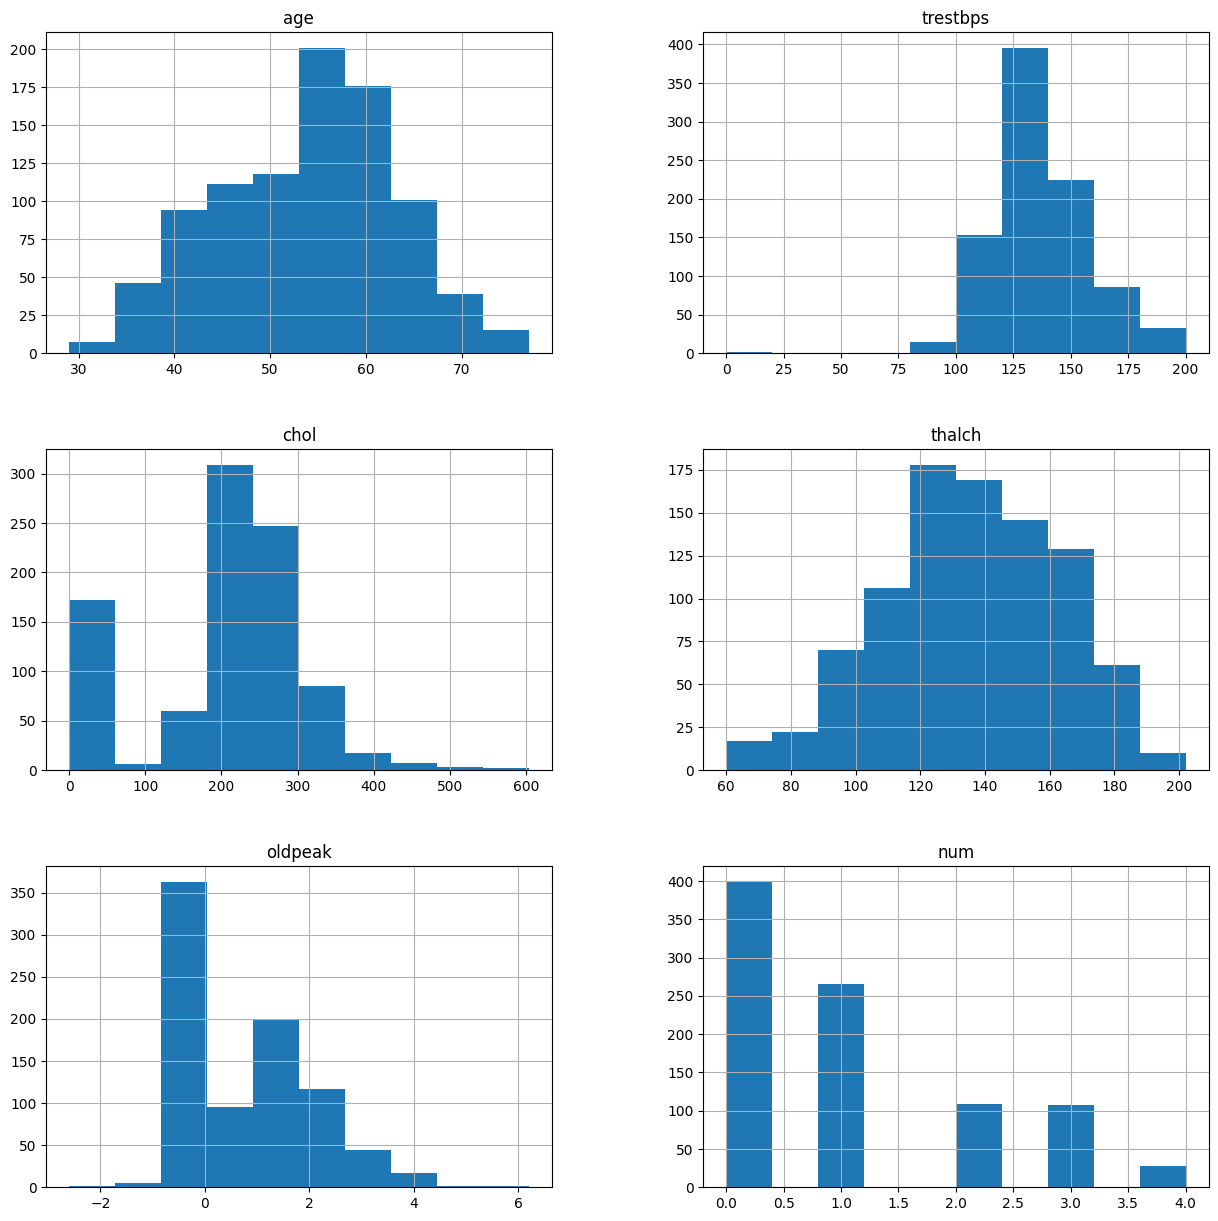

In [12]:
#plotting the data
heart.hist(figsize=(15,15))
plt.show()

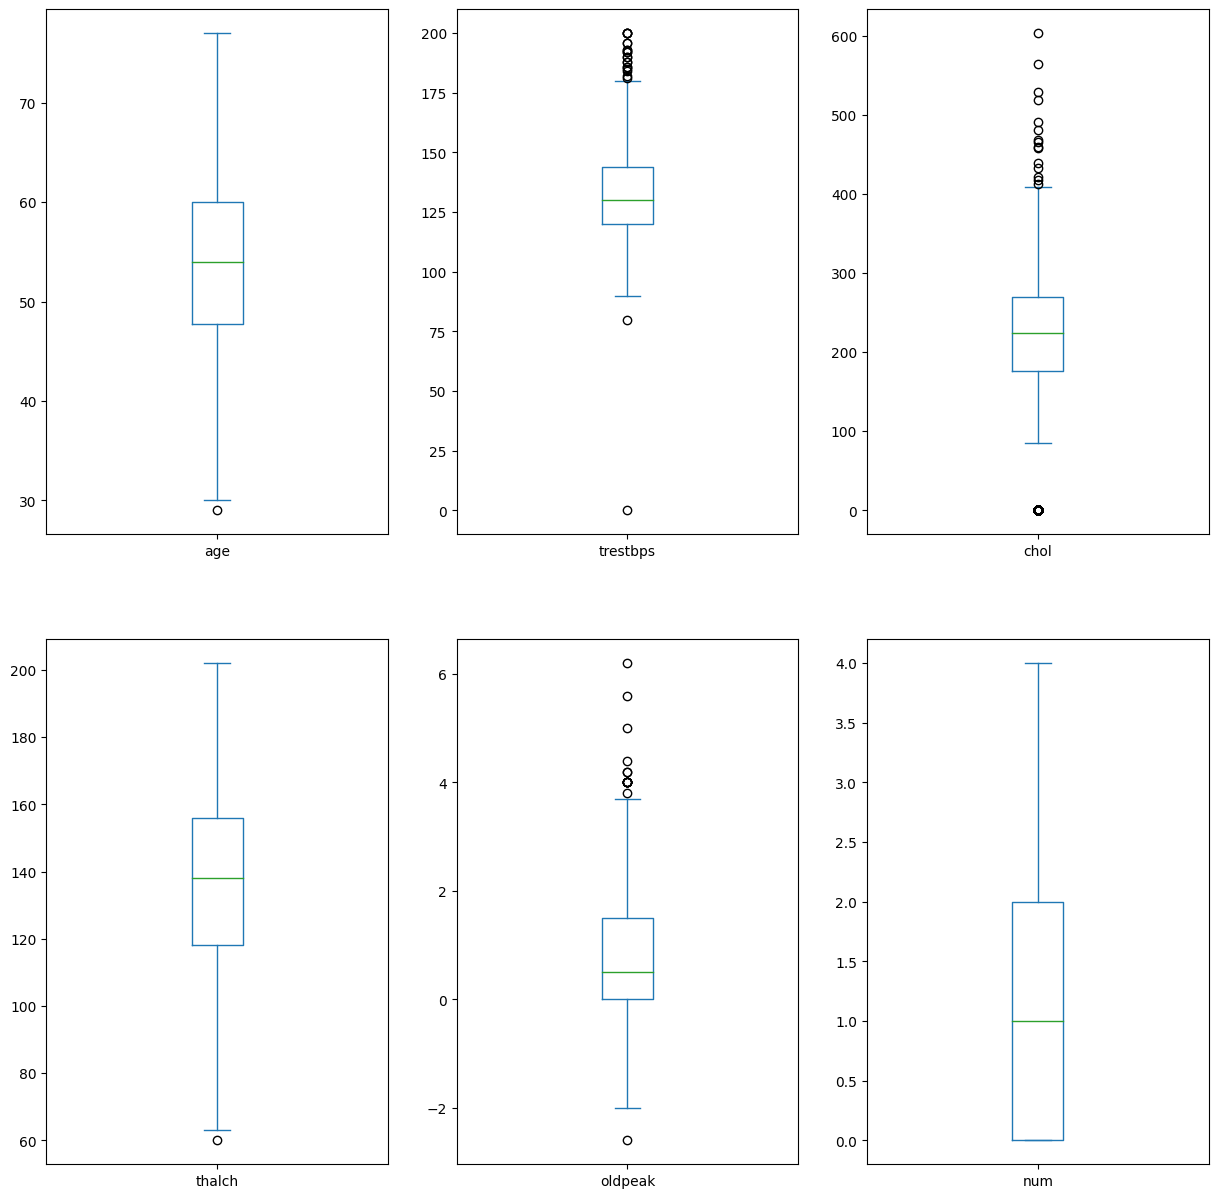

In [14]:
#boxplot of data
heart.plot(kind='box',subplots=True,layout=(2,3),figsize=(15,15))
plt.show()

In [16]:
#correlation of data
heart.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000


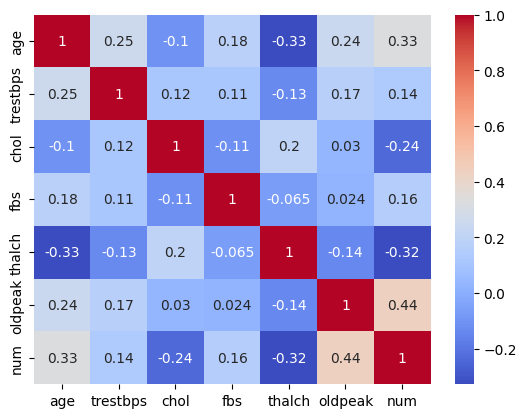

In [17]:
#heatmap of the data
sns.heatmap(heart.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.show()

In [78]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Handle missing values
heart.dropna(inplace=True)

# Separate categorical and numerical features
categorical_cols = heart.select_dtypes(include=['object']).columns
numerical_cols = heart.select_dtypes(include=['number']).columns

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encoded_features = encoder.fit_transform(heart[categorical_cols])
feature_names = encoder.get_feature_names_out(categorical_cols)
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate encoded features with numerical features
data_encoded = pd.concat([heart[numerical_cols], encoded_df], axis=1)

# Scale numerical features
scaler = StandardScaler()
heart_encoded[numerical_cols] = scaler.fit_transform(heart_encoded[numerical_cols])

# Print the processed DataFrame
heart_encoded.head()


,age,trestbps,chol,thalch,oldpeak,num,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,...,restecg_normal,restecg_st-t abnormality,exang_FALSE,exang_TRUE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.052849,0.652591,0.271960,0.501387,1.288612,-0.868621,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.366364,0.132633,0.003114,-0.201922,-0.815249,-0.868621,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.393064,0.392612,-0.095463,0.423242,-0.449360,-0.868621,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.156758,-0.751298,-0.149232,2.064297,-0.815249,-0.868621,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.393064,-1.167265,-0.014809,-0.436358,0.556834,-0.868621,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [77]:
heart_encoded.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num',
       'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_FALSE', 'exang_TRUE',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')

In [84]:
#decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data
X = heart_encoded.drop('cp_atypical angina', axis=1)
y = heart_encoded['cp_atypical angina']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")




Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
ROC-AUC: 1.0


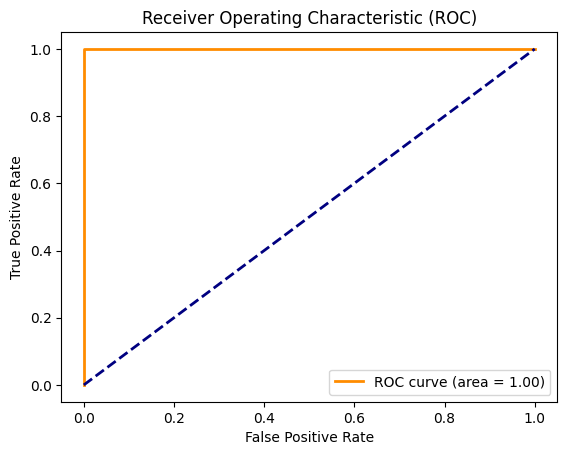

In [86]:
#plotting the roc curve
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [87]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Best cross-validation score: 1.0


Best Model - Accuracy: 1.0
Best Model - Precision: 1.0
Best Model - Recall: 1.0
Best Model - F1-Score: 1.0
Best Model - ROC-AUC: 1.0


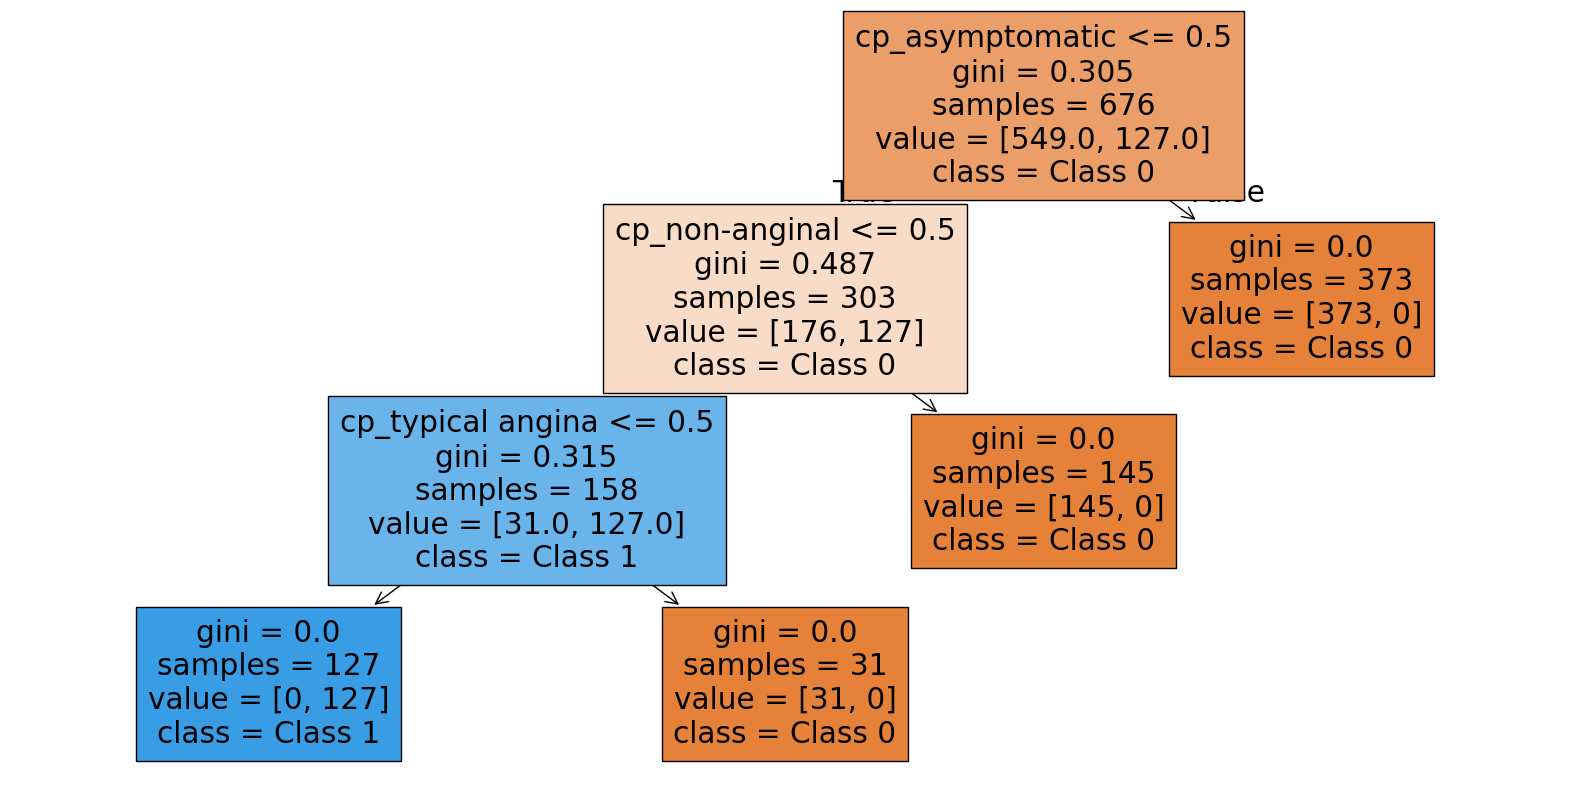

In [88]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print(f"Best Model - Accuracy: {accuracy_best}")
print(f"Best Model - Precision: {precision_best}")
print(f"Best Model - Recall: {recall_best}")
print(f"Best Model - F1-Score: {f1_best}")
print(f"Best Model - ROC-AUC: {roc_auc_best}")

# Visualize the decision tree structure
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'])
plt.show()
